In [2]:
import simpy
import random
import matplotlib.pyplot as plt

In [3]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        # Initialize the simulation environment and parameters
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        # Resources to model the crosswalk for pedestrians and cars
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        # Statistics to collect data during the simulation
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        # Process for a pedestrian crossing
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            # Record statistics for pedestrians
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        # Process for a car crossing
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            # Record statistics for cars
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        # Process for the traffic light changing colors
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        # Method to run the simulation
        pedestrian_id = 1
        car_id = 1

        # Generate processes for cars and pedestrians
        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        # Generate process for the traffic light
        self.env.process(self.traffic_light())

        # Run the simulation until the specified time
        self.env.run(until=simulation_time)
        
        # Return collected statistics
        return self.statistics
    
# Test Method
simulation = CrosswalkSimulation()
# Run the simulation with 100 cars, 100 pedestrians, and a simulation time of 120 seconds
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(simulation.statistics['pedestrian_waiting_times']) / len(simulation.statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(simulation.statistics['car_waiting_times']) / len(simulation.statistics['car_waiting_times'])
avg_system_time = sum(simulation.statistics['system_times']) / len(simulation.statistics['system_times'])
avg_interarrival_time = simulation.last_arrival_time / len(simulation.statistics['arrival_times'])
utilization_ws = avg_system_time / simulation.env.now
waiting_time_wq = avg_system_time - avg_interarrival_time
longest_car_wait = max(simulation.statistics['car_waiting_times'], default=0)
longest_pedestrian_wait = max(simulation.statistics['pedestrian_waiting_times'], default=0)

# Print the simulation statistics
print(f"\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average System Time: {avg_system_time:.2f} seconds")
print(f"Average Inter-arrival Time: {avg_interarrival_time:.2f} seconds")
print(f"Utilization (WS): {utilization_ws:.2%}")
print(f"Waiting Time in Queue (WQ): {waiting_time_wq:.2f} seconds")
print("\nAdditional Statistics:")
print(f"Longest Car Wait: {longest_car_wait:.2f} seconds")
print(f"Longest Pedestrian Wait: {longest_pedestrian_wait:.2f} seconds")



Pedestrian 1 crossed the road at time 0.81
Pedestrian 2 crossed the road at time 1.53
Car 1 crossed the road at time 1.67
Car 2 crossed the road at time 2.45
Pedestrian 3 crossed the road at time 3.08
Pedestrian 4 crossed the road at time 4.30
Car 3 crossed the road at time 4.44
Car 4 crossed the road at time 4.65
Pedestrian 5 crossed the road at time 5.13
Car 5 crossed the road at time 6.36
Pedestrian 6 crossed the road at time 6.64
Car 6 crossed the road at time 6.89
Pedestrian 7 crossed the road at time 8.38
Car 7 crossed the road at time 8.66
Pedestrian 8 crossed the road at time 9.58
Car 8 crossed the road at time 9.88
Pedestrian 9 crossed the road at time 10.15
Pedestrian 10 crossed the road at time 10.70
Pedestrian 11 crossed the road at time 11.12
Pedestrian 12 crossed the road at time 11.41
Car 9 crossed the road at time 11.80
Pedestrian 13 crossed the road at time 12.92
Car 10 crossed the road at time 13.05
Car 11 crossed the road at time 13.93
Pedestrian 14 crossed the road 

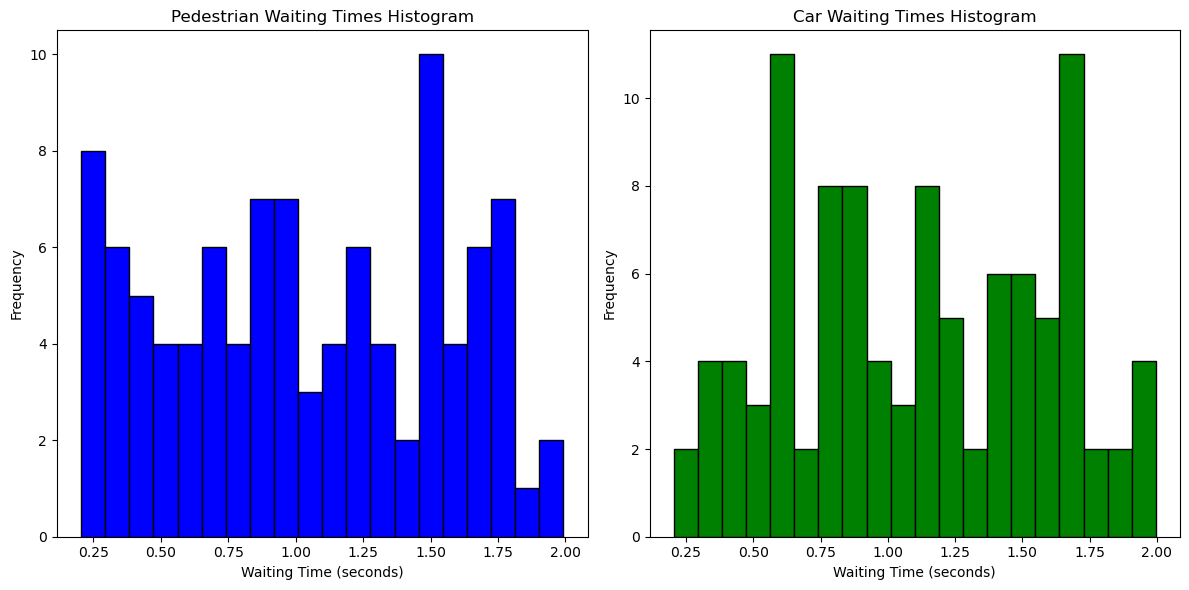

In [4]:
# Plot histograms
plt.figure(figsize=(12, 6))

        # Histogram for pedestrian waiting times
plt.subplot(1, 2, 1)
plt.hist(simulation.statistics['pedestrian_waiting_times'], bins=20, color='blue', edgecolor='black')
plt.title('Pedestrian Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

        # Histogram for car waiting times
plt.subplot(1, 2, 2)
plt.hist(simulation.statistics['car_waiting_times'], bins=20, color='green', edgecolor='black')
plt.title('Car Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

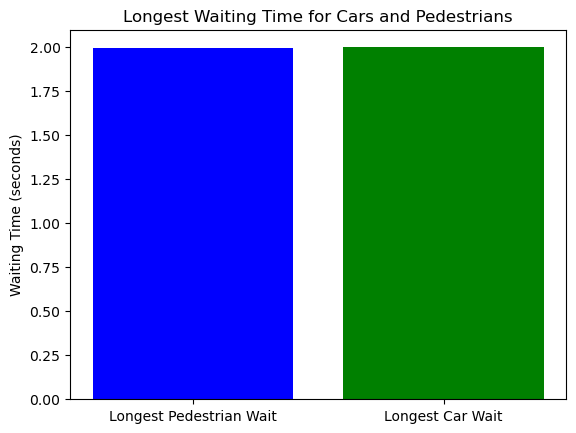

In [5]:
# Plot bar graph for longest waiting times
labels = ['Longest Pedestrian Wait', 'Longest Car Wait']
values = [longest_pedestrian_wait, longest_car_wait]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Waiting Time (seconds)')
plt.title('Longest Waiting Time for Cars and Pedestrians')
plt.show()

Pedestrian 1 crossed the road at time 0.73
Car 1 crossed the road at time 1.93
Pedestrian 2 crossed the road at time 2.00
Car 2 crossed the road at time 2.91
Pedestrian 3 crossed the road at time 3.64
Car 3 crossed the road at time 4.23
Car 4 crossed the road at time 5.03
Pedestrian 4 crossed the road at time 5.14
Car 5 crossed the road at time 5.54
Car 6 crossed the road at time 6.17
Pedestrian 5 crossed the road at time 6.35
Car 7 crossed the road at time 6.87
Car 8 crossed the road at time 7.90
Pedestrian 6 crossed the road at time 8.21
Car 9 crossed the road at time 9.09
Pedestrian 7 crossed the road at time 9.79
Car 10 crossed the road at time 10.13
Pedestrian 8 crossed the road at time 11.03
Pedestrian 9 crossed the road at time 11.30
Pedestrian 10 crossed the road at time 11.50
Car 11 crossed the road at time 11.92
Pedestrian 11 crossed the road at time 12.34
Car 12 crossed the road at time 12.56
Pedestrian 12 crossed the road at time 13.26
Car 13 crossed the road at time 13.68


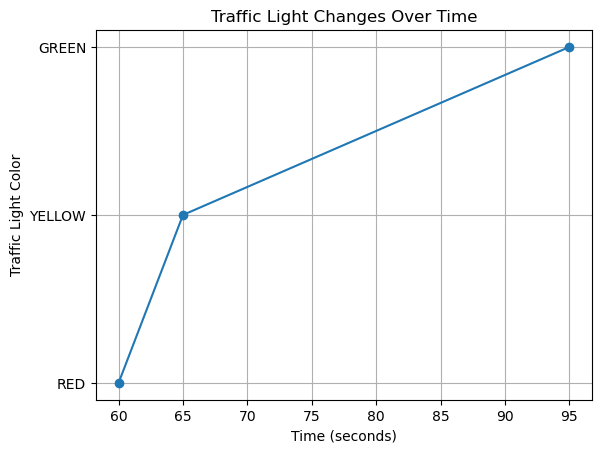

In [93]:
#Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Plot line graph for traffic light changes
light_colors, light_times = zip(*statistics['traffic_light_changes'])

plt.plot(light_times, light_colors, marker='o')
plt.yticks(['RED', 'YELLOW', 'GREEN'])
plt.xlabel('Time (seconds)')
plt.ylabel('Traffic Light Color')
plt.title('Traffic Light Changes Over Time')
plt.grid(True)
plt.show()

In [6]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'pedestrian_crossing_times': [],
            'car_crossing_times': [],
            'pedestrian_system_times': [],
            'car_system_times': [],
            'queue_length_pedestrians': [],
            'queue_length_cars': [],
            'traffic_light_changes': [],
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['pedestrian_crossing_times'].append(crossing_time)
            self.statistics['pedestrian_system_times'].append(system_time)
            self.statistics['queue_length_pedestrians'].append(len(self.qPedXing.queue))

            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            system_time = waiting_time + crossing_time

            # Update statistics
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['car_crossing_times'].append(crossing_time)
            self.statistics['car_system_times'].append(system_time)
            self.statistics['queue_length_cars'].append(len(self.qCarXing.queue))

            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(statistics['pedestrian_waiting_times']) / len(statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(statistics['car_waiting_times']) / len(statistics['car_waiting_times'])
avg_pedestrian_crossing_time = sum(statistics['pedestrian_crossing_times']) / len(statistics['pedestrian_crossing_times'])
avg_car_crossing_time = sum(statistics['car_crossing_times']) / len(statistics['car_crossing_times'])
avg_pedestrian_system_time = sum(statistics['pedestrian_system_times']) / len(statistics['pedestrian_system_times'])
avg_car_system_time = sum(statistics['car_system_times']) / len(statistics['car_system_times'])


avg_queue_length_pedestrians = sum(statistics['queue_length_pedestrians']) / len(statistics['queue_length_pedestrians'])
avg_queue_length_cars = sum(statistics['queue_length_cars']) / len(statistics['queue_length_cars'])

print("\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average Pedestrian Crossing Time: {avg_pedestrian_crossing_time:.2f} seconds")
print(f"Average Car Crossing Time: {avg_car_crossing_time:.2f} seconds")
print(f"Average Pedestrian System Time: {avg_pedestrian_system_time:.2f} seconds")
print(f"Average Car System Time: {avg_car_system_time:.2f} seconds")
print(f"Average Queue Length of Pedestrians: {avg_queue_length_pedestrians:.2f}")
print(f"Average Queue Length of Cars: {avg_queue_length_cars:.2f}")
print(f"Longest Pedestrian Wait: {statistics['longest_pedestrian_wait']:.2f} seconds")
print(f"Longest Car Wait: {statistics['longest_car_wait']:.2f} seconds")


Pedestrian 1 crossed the road at time 1.08
Pedestrian 2 crossed the road at time 1.34
Car 1 crossed the road at time 1.50
Pedestrian 3 crossed the road at time 2.91
Car 2 crossed the road at time 3.31
Car 3 crossed the road at time 3.88
Pedestrian 4 crossed the road at time 4.07
Pedestrian 5 crossed the road at time 5.37
Car 4 crossed the road at time 5.70
Car 5 crossed the road at time 6.25
Pedestrian 6 crossed the road at time 6.80
Pedestrian 7 crossed the road at time 7.24
Car 6 crossed the road at time 7.47
Pedestrian 8 crossed the road at time 8.32
Pedestrian 9 crossed the road at time 8.64
Car 7 crossed the road at time 9.21
Pedestrian 10 crossed the road at time 9.60
Car 8 crossed the road at time 9.88
Car 9 crossed the road at time 10.74
Pedestrian 11 crossed the road at time 11.60
Pedestrian 12 crossed the road at time 11.93
Car 10 crossed the road at time 12.34
Pedestrian 13 crossed the road at time 12.68
Pedestrian 14 crossed the road at time 13.75
Car 11 crossed the road at

KeyError: 'longest_pedestrian_wait'

In [7]:
import numpy as np

# Extract waiting times for pedestrians and cars
pedestrian_waiting_times = np.array(statistics['pedestrian_waiting_times'])
car_waiting_times = np.array(statistics['car_waiting_times'])

# Calculate mean and variance for pedestrian waiting times
mean_pedestrian_waiting_time = np.mean(pedestrian_waiting_times)
variance_pedestrian_waiting_time = np.var(pedestrian_waiting_times)

# Calculate mean and variance for car waiting times
mean_car_waiting_time = np.mean(car_waiting_times)
variance_car_waiting_time = np.var(car_waiting_times)

# Print the results
print("\nWaiting Time Statistics:")
print(f"Mean Pedestrian Waiting Time: {mean_pedestrian_waiting_time:.2f} seconds")
print(f"Variance Pedestrian Waiting Time: {variance_pedestrian_waiting_time:.2f} seconds^2")
print(f"Mean Car Waiting Time: {mean_car_waiting_time:.2f} seconds")
print(f"Variance Car Waiting Time: {variance_car_waiting_time:.2f} seconds^2")



Waiting Time Statistics:
Mean Pedestrian Waiting Time: 1.06 seconds
Variance Pedestrian Waiting Time: 0.28 seconds^2
Mean Car Waiting Time: 1.15 seconds
Variance Car Waiting Time: 0.27 seconds^2


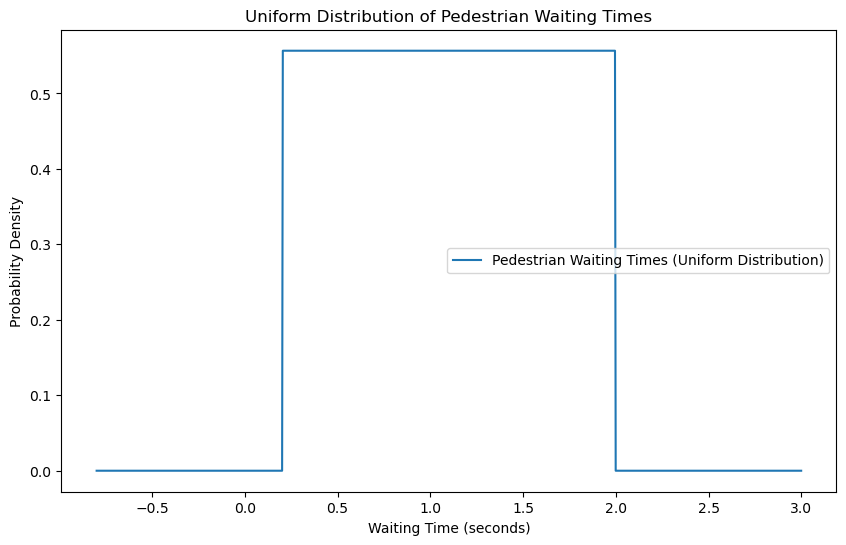

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the uniform distribution
a_pedestrian = np.min(pedestrian_waiting_times)
b_pedestrian = np.max(pedestrian_waiting_times)

# Create a range of values for the x-axis
x_values = np.linspace(a_pedestrian - 1, b_pedestrian + 1, 1000)

# Calculate the PDF using the uniform distribution formula
pdf_pedestrian = stats.uniform.pdf(x_values, loc=a_pedestrian, scale=(b_pedestrian - a_pedestrian))

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_pedestrian, label='Pedestrian Waiting Times (Uniform Distribution)')
plt.title('Uniform Distribution of Pedestrian Waiting Times')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


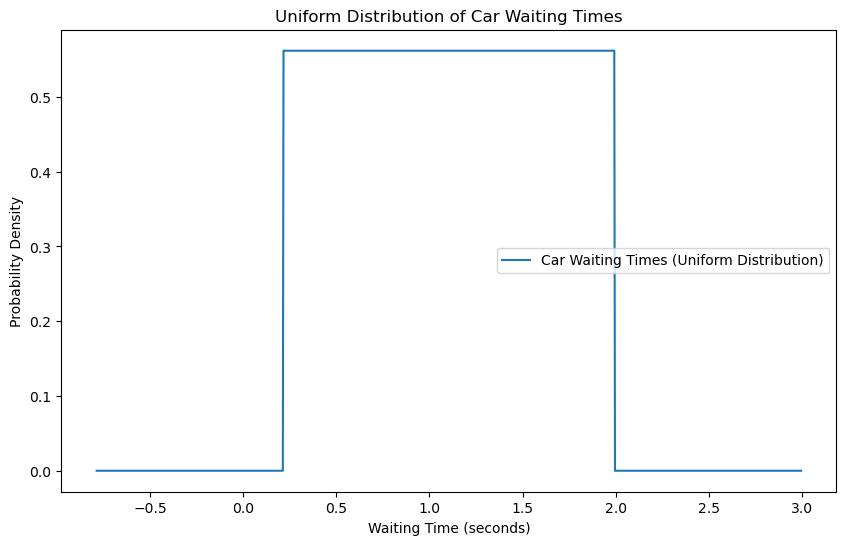

In [101]:
#import matplotlib.pyplot as plt
#import scipy.stats as stats

# Parameters for the uniform distribution
a_car = np.min(car_waiting_times)
b_car = np.max(car_waiting_times)

# Create a range of values for the x-axis
x_values = np.linspace(a_car - 1, b_car + 1, 1000)

# Calculate the PDF using the uniform distribution formula
pdf_car = stats.uniform.pdf(x_values, loc=a_car, scale=(b_car - a_car))

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_car, label='Car Waiting Times (Uniform Distribution)')
plt.title('Uniform Distribution of Car Waiting Times')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()